In [64]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv("emails.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [66]:
data.shape

(5171, 4)

In [67]:
data['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [68]:
data['spam'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [69]:
import seaborn as sns

<Axes: ylabel='count'>

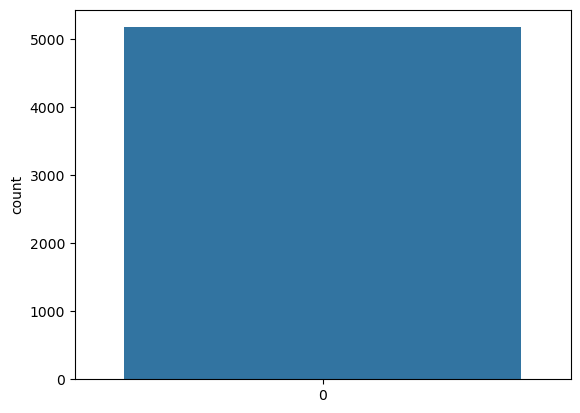

In [70]:
sns.countplot(data['spam'])

In [71]:

data.duplicated().sum()

0

In [72]:
data.drop_duplicates(inplace=True)

In [73]:
data.duplicated().sum()

0

In [74]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [75]:
data.shape

(5171, 4)

In [76]:
5728 - 33

5695

In [77]:
data['spam'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

<Axes: ylabel='count'>

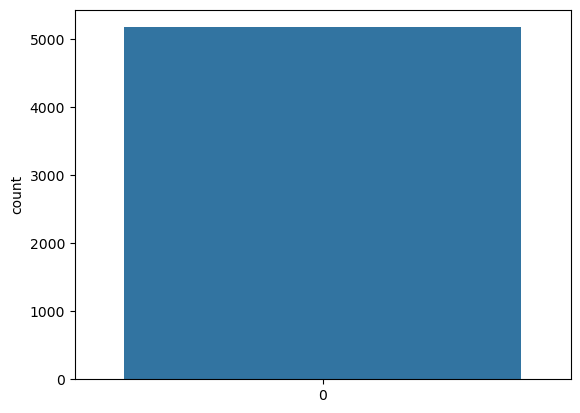

In [78]:
sns.countplot(data['spam'])

In [79]:
data['spam'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [80]:
X = data['text'].values
y = data['spam'].values

In [81]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [83]:
X_train.shape

(4136,)

In [84]:
X_test.shape

(1035,)

In [85]:
y_train.shape

(4136,)

In [86]:
y_test.shape

(1035,)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [89]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
len(x_train.toarray())

4136

In [91]:
len(x_train.toarray()[0])

43487

In [92]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [93]:
nb.fit(x_train, y_train)

MultinomialNB()

In [94]:
x_test = cv.transform(X_test)

In [95]:
len(x_test.toarray())

1035

In [96]:
len(x_test.toarray()[0])

43487

In [97]:
y_pred = nb.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9729468599033816

In [100]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9876692456479691

In [101]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [102]:
clean_email = cv.transform(email)

In [103]:
len(clean_email.toarray()[0])

43487

In [104]:
check = nb.predict(clean_email)[0]

In [105]:
check

0

In [106]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!
